In [47]:
# pandas
import pandas as pd 

# matplotlib
import matplotlib.pyplot as plt 

# seaborn
import seaborn as sns
# numpy
import numpy as np 

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [48]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<!-- ### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d  -->

# Exploratory Data Analysis (or EDA)

In [49]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Data Visualization

## Barchart for Mushorroms cap shapes

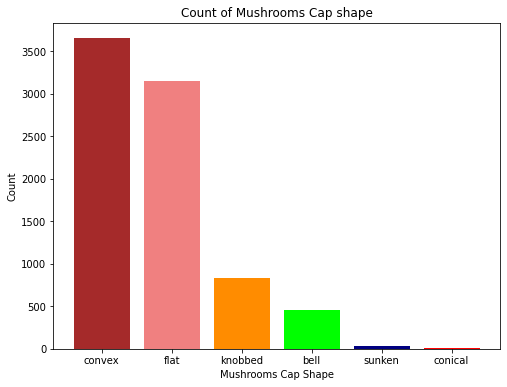

In [52]:
plt.figure(figsize=(8,6))
cap_shapes = data['cap-shape'].value_counts().tolist()
shape_names = ['convex','flat','knobbed','bell','sunken','conical']
colors = ['brown','lightcoral','darkorange','lime','navy','red']
plt.bar(shape_names,cap_shapes,color = colors);
plt.xlabel('Mushrooms Cap Shape');
plt.ylabel("Count");
plt.title("Count of Mushrooms Cap shape");

## Mushrooms Cap Color

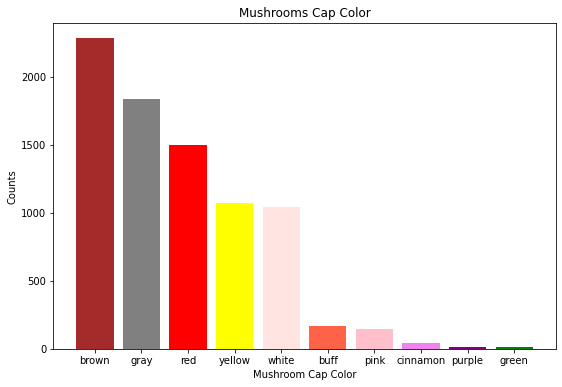

In [53]:
plt.figure(figsize=(9,6))
cap_color = data['cap-color'].value_counts().tolist()
color_name = ['brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green']
colors = ['brown','gray','red','yellow','mistyrose','tomato','pink','violet','purple','green']
plt.bar(color_name,cap_color,color = colors);
plt.ylabel('Counts');
plt.xlabel("Mushroom Cap Color");
plt.title("Mushrooms Cap Color");

## No of Mushrooms are edible and poisonous based on cap color

In [54]:
edible_mushrooms = data[data['class'] == 'e']['cap-color'].value_counts().tolist()[:-2]
non_edible_mushrooms = data[data['class'] == 'p']['cap-color'].value_counts().tolist()
color_name = ['brown', 'gray','red','yellow','white','buff','pink','cinnamon']

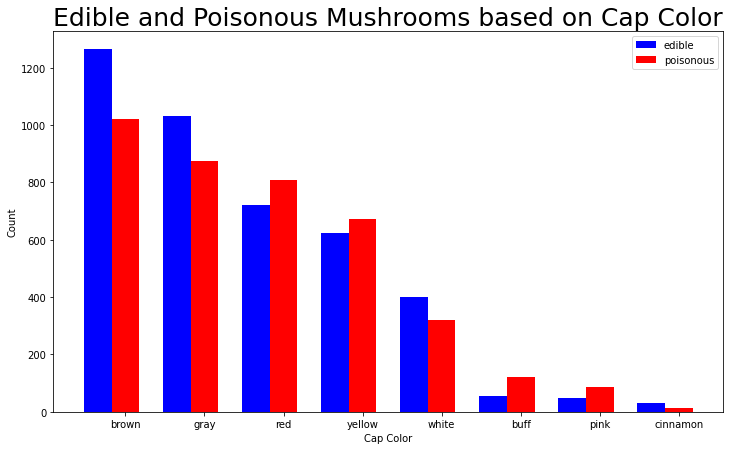

In [55]:
fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(8)
bar_width = 0.35
edible_bars = ax.bar(index, edible_mushrooms, bar_width,color='b',label='edible')
poison_bars = ax.bar(index+bar_width,non_edible_mushrooms ,bar_width, color='r',label='poisonous')
plt.xticks(index + bar_width, tuple(color_name));
plt.title("Edible and Poisonous Mushrooms based on Cap Color",{'fontsize':25})
plt.xlabel("Cap Color");
plt.ylabel("Count")
plt.legend();

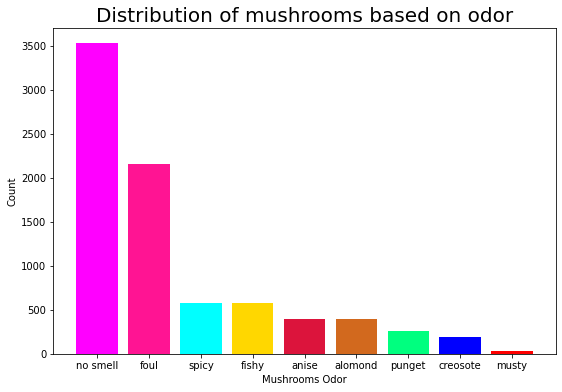

In [56]:
plt.figure(figsize=(9,6))
odor_val = data['odor'].value_counts().tolist()
odors = ['no smell','foul','spicy','fishy','anise','alomond','punget','creosote','musty']
clrs = ['magenta','deeppink','cyan','gold','crimson','chocolate','springgreen','blue','red']
plt.bar(odors,odor_val,color = clrs);
plt.xlabel('Mushrooms Odor');
plt.ylabel("Count");
plt.title("Distribution of mushrooms based on odor",{'fontsize':20});

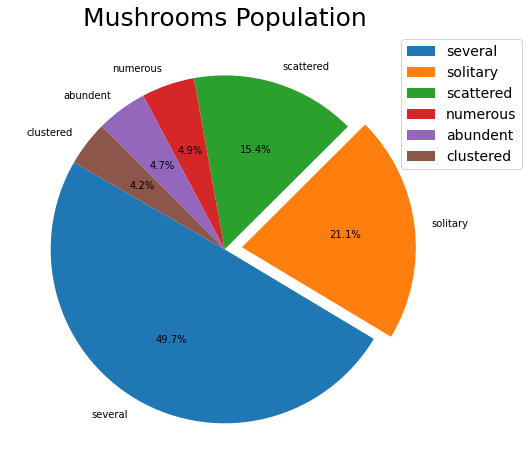

In [57]:
plt.figure(figsize=(8,8))
populations = data.population.value_counts().tolist()
labels = ['several','solitary','scattered','numerous','abundent','clustered']
explode =  (0, 0.1, 0, 0, 0, 0)
plt.pie(populations,labels=labels,startangle=150,explode=explode,autopct='%1.1f%%');
plt.title('Mushrooms Population',{'fontsize':25})
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right",fontsize=14);

In [58]:
data[data['class'] == 'p']['population'].value_counts()

v    2848
y     648
s     368
c      52
Name: population, dtype: int64

## Distribution of poisounous mushrooms based on population

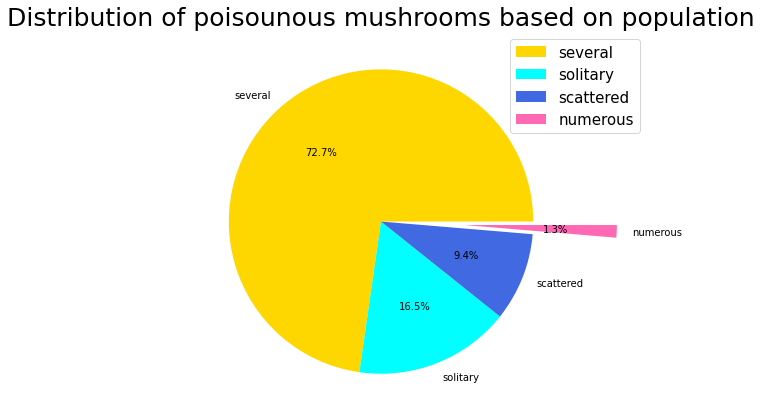

In [59]:
plt.figure(figsize=(8,7))
plt.pie(data[data['class'] == 'p']['population'].value_counts().tolist(),
        autopct='%1.1f%%',
        labels = ['several','solitary','scattered','numerous'],
        colors=['gold','cyan','royalblue','hotpink'],
        explode = (0,0,0,0.55)
        );
plt.title('Distribution of poisounous mushrooms based on population',{'fontsize':25});
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right",fontsize=15);

## Edible mushrooms based on population

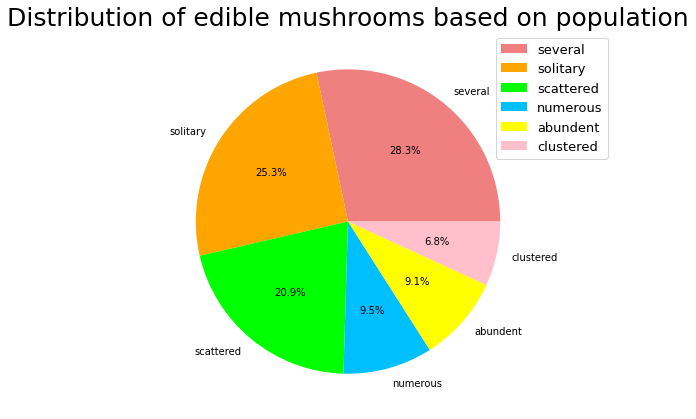

In [60]:
plt.figure(figsize=(8,7))
plt.pie(data[data['class'] == 'e']['population'].value_counts().tolist(),
        autopct='%1.1f%%',
        labels = ['several','solitary','scattered','numerous','abundent','clustered'],
        colors=['lightcoral','orange','lime','deepskyblue','yellow','pink']
        );
plt.title('Distribution of edible mushrooms based on population',{'fontsize':25});
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right",fontsize=13);

## Habitat

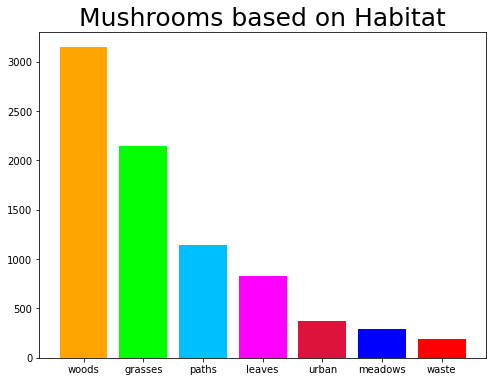

In [61]:
plt.figure(figsize=(8,6))
habitats = data['habitat'].value_counts().tolist()
habitats_names = ['woods','grasses','paths','leaves','urban','meadows','waste']
colors = ['orange','lime','deepskyblue','magenta','crimson','blue','red']
plt.title("Mushrooms based on Habitat",{'fontsize':25});
plt.bar(habitats_names,habitats,color = colors);

In [62]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Preprocessing

In [63]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
scaled_feaures = encoder.fit_transform(data)


In [64]:
mush_df = pd.DataFrame(scaled_feaures,columns=data.columns,dtype='int64')
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Dependent and Independent Features

In [65]:
X = mush_df.drop('class',axis=1)
y = mush_df['class']

## To get a good prediction, divide the data into training and testing data, it is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Models

In [67]:
models = {
    SVC(kernel='rbf',C= 1.0,gamma=0.8):'Support Vector Machine',
    LogisticRegression(max_iter=400):'Logistic Regression',
    RandomForestClassifier(max_depth=8,n_estimators=120):'Random Forest',
    XGBClassifier(eval_metric  = 'error',booster='gbtree'):'XGBClassifier'
}
for m in models.keys():
    m.fit(X_train,y_train)

# iNterpret

## To determine how well a model is performing, we often validate its performance on new unseen instances that were not available to the model during training

In [68]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Support Vector Machine is :  99.87692307692308 %
Accuracy Score for Logistic Regression is :  94.64615384615385 %
Accuracy Score for Random Forest is :  100.0 %
Accuracy Score for XGBClassifier is :  100.0 %


# Feature Importance

## XGBOOST Classifier

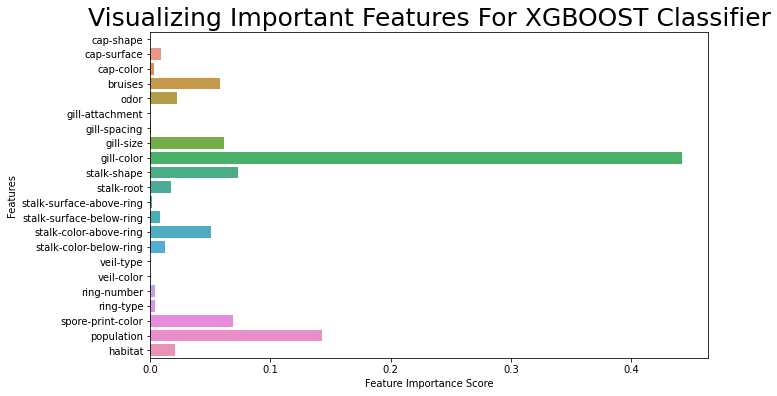

In [69]:
plt.figure(figsize=(10,6))
xgboost_cls = XGBClassifier(eval_metric  = 'error',booster='gbtree')
xgboost_cls.fit(X_train,y_train)
feature_imp = xgboost_cls.feature_importances_
sns.barplot(x=feature_imp, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For XGBOOST Classifier",{'fontsize':25})
plt.show();

## We can see here that many features are not very mush important to makepredictions so we remove them

In [70]:
new_X = mush_df.drop(['cap-shape','gill-attachment','gill-spacing','veil-type', 'veil-color','stalk-surface-above-ring','ring-number',
       'ring-type'],axis=1)

In [71]:
new_Xtrain,new_Xtest,new_ytrain,new_ytest = train_test_split(new_X,y,test_size=0.2,random_state=43)

## Check accuracy after removing some features.

In [78]:
models = {
    SVC(kernel='rbf',C= 1.0,gamma=0.8):'Support Vector Machine',
    LogisticRegression(max_iter=400):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    XGBClassifier(eval_metric  = 'error',booster='gbtree'):'XGBClassifier'
}
for m in models.keys():
    m.fit(new_Xtrain,new_ytrain)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(new_Xtest,new_ytest)*100,"%")

Accuracy Score for Support Vector Machine is :  100.0 %
Accuracy Score for Logistic Regression is :  100.0 %
Accuracy Score for Random Forest is :  100.0 %
Accuracy Score for XGBClassifier is :  100.0 %


## Plot Heatmaps for all models

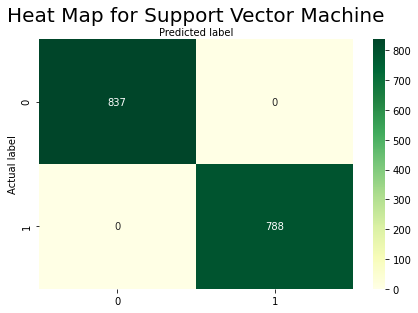

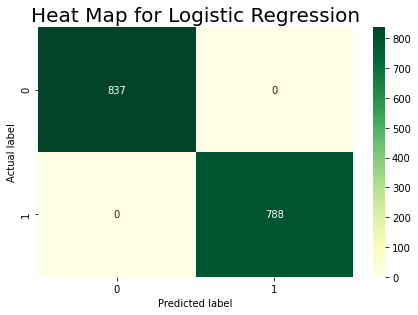

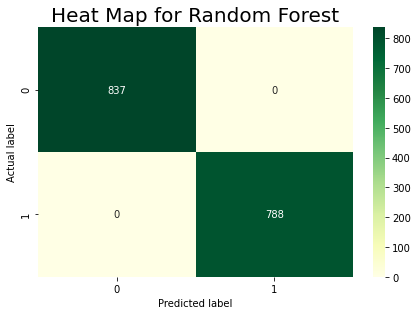

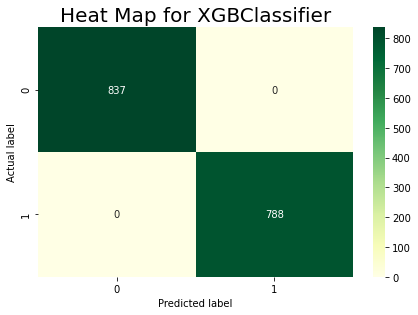

In [73]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


for model,name in models.items():
    y_pred = model.predict(new_Xtest)
    cnf_matrix = confusion_matrix(new_ytest,y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGn',
            fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(f'Heat Map for {name}', {'fontsize':20})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()